# Exercise 1 & 2 Load the data into a pandas data frame. Calculate the "alternate allele frequency for each SNP.

In [82]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [83]:
#Import data as a variable
raw_data = pd.read_csv("/Users/cmdb/qbb2020-answers/day2-evening/matrix_1kg.txt",
                       sep = "\t")
raw_data

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
sub_data = raw_data.iloc[:, 4:]
sub_data #sub-data that don't include position, chormosome, etc. 

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
average = sub_data.sum(axis=1) / 2548 #average for each row
average 

0       0.000785
1       0.038462
2       0.006672
3       0.004317
4       0.000785
          ...   
9995    0.041209
9996    0.000392
9997    0.002747
9998    0.057692
9999    0.005102
Length: 10000, dtype: float64

In [86]:
alt_freq = average / 2 #calculate alternate allele frecuency = average / total # of chomosomes in the population 
alt_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

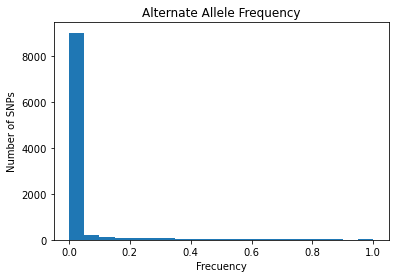

In [87]:
#Histogram parameters 
fig, ax = plt.subplots()
ax.hist(alt_freq, bins=20)
plt.title("Alternate Allele Frequency")
plt.xlabel("Frecuency")
plt.ylabel("Number of SNPs")
plt.show()

# Exercise 3 - Subset the data frame to "common variation", where the alternate allele frequency is between 0.05 and 0.95.

In [88]:
#min allele frequency
Min = alt_freq > 0.05
print(Min)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [89]:
#max allele freq
Max = alt_freq < 0.95
print(Max)

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Length: 10000, dtype: bool


In [90]:
# the & symbol will compare both variables to see which ones are true for both. 
variable = Min & Max
print(variable)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [91]:
common = sub_data.loc[variable,:] #make a sub data set of only the true values of variable. 
common

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


In [92]:
#average for each row that is between 0.05 and 0.95
average2 = common.sum(axis=1) / 2548 
average2

20      0.160518
32      1.191523
38      0.811224
41      0.188776
46      0.195055
          ...   
9957    1.683673
9959    0.231947
9974    0.361460
9975    1.620094
9980    0.155416
Length: 986, dtype: float64

In [93]:
alt_freq2 = average2 / 2 #calculate alternate allele frecuency = average / total # of chomosomes in the population 
alt_freq2

20      0.080259
32      0.595761
38      0.405612
41      0.094388
46      0.097527
          ...   
9957    0.841837
9959    0.115973
9974    0.180730
9975    0.810047
9980    0.077708
Length: 986, dtype: float64

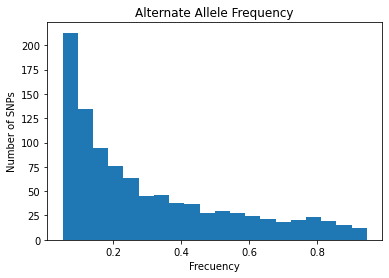

In [94]:
#histogram parameters
fig, ax = plt.subplots()
ax.hist(alt_freq2, bins=20)
plt.title("Alternate Allele Frequency")
plt.xlabel("Frecuency")
plt.ylabel("Number of SNPs")
plt.show()

# Exercise 3 Perform principal components analysis to cluster the samples based on their SNP genotypes. Plot your samples on the first and second principal components.

In [95]:
#Import data as a variable
raw_data = pd.read_csv("/Users/cmdb/qbb2020-answers/day2-evening/matrix_1kg.txt",
                       sep = "\t")
raw_data

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
sub_data1 = raw_data.drop(['CHROM','POS', 'REF','ALT'], axis=1) #create sub-data set that contains only SNPs and chromosome number 
print(sub_data1)

      HG00096  HG00097  HG00099  HG00100  HG00101  HG00102  HG00103  HG00104  \
0           0        0        0        0        0        0        0        0   
1           0        0        1        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
9995        0        0        0        0        0        0        0        0   
9996        0        0        0        0        0        0        0        0   
9997        0        0        0        0        0        0        0        1   
9998        0        0        0        0        0        0        0        0   
9999        0        0        0        0        0        0        0        0   

      HG00105  HG00106  ...  NA21128  N

In [97]:
pca_input = sub_data1.T #transpose axis to treat samples as variables.
pca_input

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
HG00096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00099,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
pca_input_standardized = StandardScaler().fit_transform(pca_input) #transforms means and variances and standarizes them
pca_input_standardized.mean(axis = 0)

array([ 2.81174983e-16,  8.04062032e-16, -6.15742413e-16, ...,
       -3.13720792e-16, -1.76030043e-15,  8.90923477e-16])

In [99]:
pca_input_standardized.var(axis = 0) #checks variance and that all are 1

array([1., 1., 1., ..., 1., 1., 1.])

In [100]:
#makes PCA and its output
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[ -8.33942982, -10.42879311,  -2.49890187, ...,   0.16405833,
          0.40023627,   0.08629462],
       [ -8.46123843, -10.3233311 ,  -5.2782976 , ...,  -0.09737275,
         -0.01190764,  -0.19737829],
       [ -8.29420011,  -9.02380876,  -2.86033919, ...,  -0.20593794,
         -0.302849  ,  -0.29126526],
       ...,
       [ -6.33274903,  -3.78074149,   7.0150775 , ...,  -0.03063208,
          0.59368244,   0.99496117],
       [ -8.61492143,  -2.74358253,   8.78428656, ...,  -0.07250376,
         -0.50093204,   0.52150204],
       [ -6.07966909,  -1.78563064,   9.20835166, ...,  -0.57462458,
         -0.07326813,   0.22013198]])

In [101]:
pca_output.shape #checks shape of our PCA

(2548, 10)

In [102]:
#makes data frame for PCA1 through 10
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-8.339430,-10.428793,-2.498902,-0.436233,-5.269806,0.779184,0.566570,0.164058,0.400236,0.086295
1,-8.461238,-10.323331,-5.278298,-0.251843,-3.238412,0.520203,0.051430,-0.097373,-0.011908,-0.197378
2,-8.294200,-9.023809,-2.860339,-0.795209,-4.286224,0.506875,0.053404,-0.205938,-0.302849,-0.291265
3,-7.921072,-9.075322,-5.272598,-0.260754,-2.771533,-0.894384,0.581317,0.220325,-0.207809,-0.579107
4,-8.883854,-10.099686,-5.284142,0.356134,-0.705738,0.401782,-0.099277,0.115388,0.048403,-0.082260
...,...,...,...,...,...,...,...,...,...,...
2543,-8.045113,-0.478123,8.875021,0.565786,3.381528,-0.799433,-0.435810,0.184669,0.843443,1.509259
2544,-8.438440,-3.946024,11.075478,0.329359,1.412551,0.348655,1.213698,0.471819,1.236788,-0.417888
2545,-6.332749,-3.780741,7.015078,0.829888,1.234801,-1.235496,0.089079,-0.030632,0.593682,0.994961
2546,-8.614921,-2.743583,8.784287,-0.218397,1.771896,0.013727,-0.965528,-0.072504,-0.500932,0.521502


Text(0, 0.5, 'PCA2')

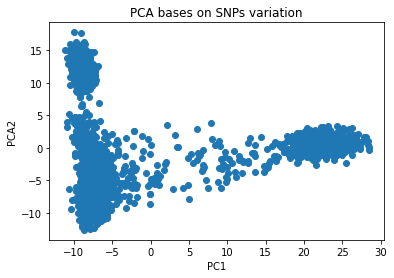

In [103]:
#Plotting PCA data
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
plt.title('PCA bases on SNPs variation')
plt.xlabel('PC1')
plt.ylabel('PCA2')